In [25]:
import pandas as pd 
import psycopg2
import matplotlib.pyplot as plt

In [7]:
conn = psycopg2.connect(
    dbname="historian",
    user ="postgres",
    password="kTP6AXTckJ",
    host="localhost",
    port="5432"
)

In [10]:
query = "select * from public.events limit 10"
query = """ 
select 
	time, run_id, category , category_sub , 
	data->'skill' as skill_name, 
	data->'episode_number' as episode,
	data->'obs' as obs,
	data->'reward' as reward,
	data->'raw_action' as action
from public.events 
where category in ('base-skill-env','teacher') and category_sub  in ('step','compute-reward')
order by time 
"""

df = pd.read_sql(query, conn)

/var/folders/y5/33d737hn3cg69hxsxbhhh0l80000gn/T/ipykernel_74156/211884267.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [ ]:
df

In [29]:
df[(df['run_id']=='6b102fdd-c0da-42b3-8632-4e44073e0e19') & (df['category']=='teacher') ]

,time,run_id,category,category_sub,skill_name,episode,obs,reward,action
2,2023-09-26 15:08:53.774000+00:00,6b102fdd-c0da-42b3-8632-4e44073e0e19,teacher,compute-reward,reaction,2.0,"{'T': 310.42869614487523, 'Ca': 8.585198651643...",0.000000,[-2.3867621421813965]
8,2023-09-26 15:08:58.357000+00:00,6b102fdd-c0da-42b3-8632-4e44073e0e19,teacher,compute-reward,reaction,2.0,"{'T': 310.42869614487523, 'Ca': 8.585198651643...",0.000000,[3.6371781826019287]
16,2023-09-26 15:08:58.613000+00:00,6b102fdd-c0da-42b3-8632-4e44073e0e19,teacher,compute-reward,reaction,3.0,"{'T': 310.00130474424793, 'Ca': 8.613383276456...",23.050357,[-5.86942720413208]
19,2023-09-26 15:08:58.613000+00:00,6b102fdd-c0da-42b3-8632-4e44073e0e19,teacher,compute-reward,reaction,3.0,"{'T': 310.42869614487523, 'Ca': 8.585198651643...",0.000000,[1.962625503540039]
31,2023-09-26 15:08:58.827000+00:00,6b102fdd-c0da-42b3-8632-4e44073e0e19,teacher,compute-reward,reaction,3.0,"{'T': 307.16958493599486, 'Ca': 8.720980757573...",9.698333,[2.857625961303711]
...,...,...,...,...,...,...,...,...,...
292594,2023-09-26 16:27:48.175000+00:00,6b102fdd-c0da-42b3-8632-4e44073e0e19,teacher,compute-reward,reaction,22.0,"{'T': 400.52703221899856, 'Ca': 0.773063339692...",0.604437,[0.06731605529785156]
292600,2023-09-26 16:27:48.175000+00:00,6b102fdd-c0da-42b3-8632-4e44073e0e19,teacher,compute-reward,reaction,22.0,"{'T': 400.533058128513, 'Ca': 0.77295823407541...",0.602862,[-0.07475566864013672]
292603,2023-09-26 16:27:48.283000+00:00,6b102fdd-c0da-42b3-8632-4e44073e0e19,teacher,compute-reward,reaction,22.0,"{'T': 400.5334679394627, 'Ca': 0.7729385634285...",0.605988,[-0.0582275390625]
292612,2023-09-26 16:27:48.406000+00:00,6b102fdd-c0da-42b3-8632-4e44073e0e19,teacher,compute-reward,reaction,22.0,"{'T': 400.5285139663253, 'Ca': 0.7730282028250...",0.607516,[0.05191802978515625]


In [62]:
df.apply(lambda row: row[])['obs']

{'T': 310.42869614487523,
 'Ca': 8.585198651643564,
 'Tc': 289.6132378578186,
 'Cref': 8.57,
 'Tref': 311.2612}

In [32]:
df_group = df.groupby(['run_id','episode'])['reward'].mean()

#group by run_id and episode, with (min, mean, max) reward

In [66]:
df['obs']

2         {'T': 310.42869614487523, 'Ca': 8.585198651643...
8         {'T': 310.42869614487523, 'Ca': 8.585198651643...
16        {'T': 310.00130474424793, 'Ca': 8.613383276456...
19        {'T': 310.42869614487523, 'Ca': 8.585198651643...
31        {'T': 307.16958493599486, 'Ca': 8.720980757573...
                                ...                        
292699    {'T': 310.42869614487523, 'Ca': 8.585198651643...
292702    {'T': 310.42869614487523, 'Ca': 8.585198651643...
292707    {'T': 310.42869614487523, 'Ca': 8.585198651643...
292710    {'T': 310.42869614487523, 'Ca': 8.585198651643...
292711    {'T': 310.42869614487523, 'Ca': 8.585198651643...
Name: obs, Length: 41824, dtype: object

In [38]:
df_group.reset_index()

,run_id,episode,reward
0,48d172a4-a0ba-4fad-80a6-603b0d960ff0,2.0,0.000000
1,48d172a4-a0ba-4fad-80a6-603b0d960ff0,3.0,0.000000
2,48d172a4-a0ba-4fad-80a6-603b0d960ff0,22.0,0.000000
3,6b102fdd-c0da-42b3-8632-4e44073e0e19,2.0,0.000000
4,6b102fdd-c0da-42b3-8632-4e44073e0e19,3.0,5.322503
...,...,...,...
445,6b102fdd-c0da-42b3-8632-4e44073e0e19,444.0,4.157506
446,6b102fdd-c0da-42b3-8632-4e44073e0e19,445.0,4.963608
447,6b102fdd-c0da-42b3-8632-4e44073e0e19,446.0,9.296389
448,6b102fdd-c0da-42b3-8632-4e44073e0e19,447.0,14.224710


In [96]:
import numpy as np

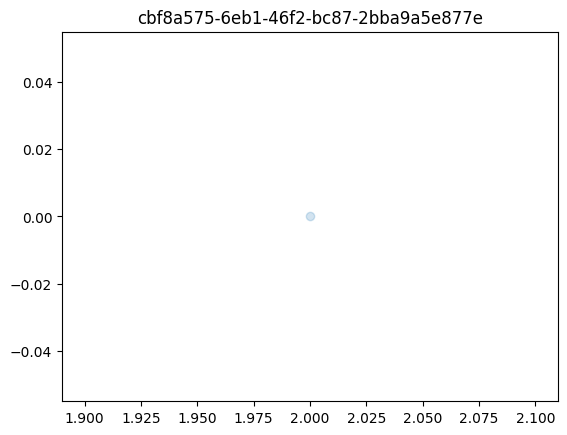

ValueError: too many values to unpack (expected 2)

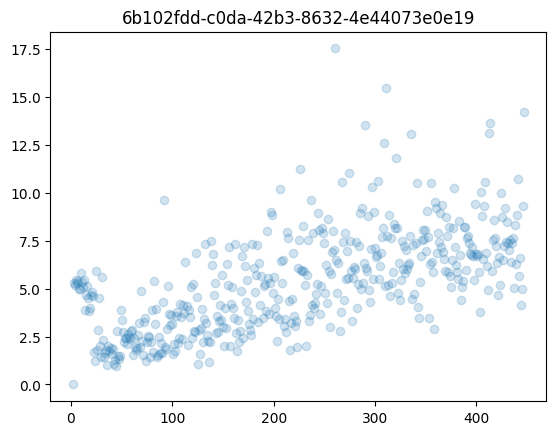

In [105]:
for run_id in list(set([x[0] for x in df_group.index])):
    plt.scatter(df_group[run_id].index, df_group[run_id].reset_index()['reward'], alpha=0.2)
    plt.title(run_id)
    if len(df_group[run_id]) > 10:
        slope, intercept = np.polyfit(df_group[run_id].index, df_group[run_id].reset_index()['reward'], 1)
        plt.plot(df_group[run_id].index, slope * df_group[run_id].index + intercept, 'r')
    #df_group[run_id].plot(kind='scatter',subplots=True, title=run_id)
    plt.show()

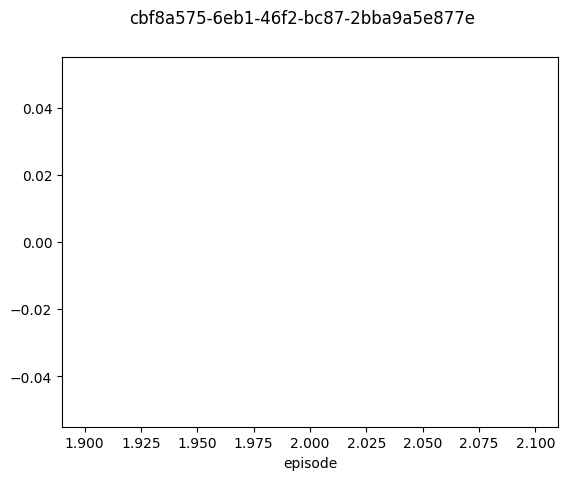

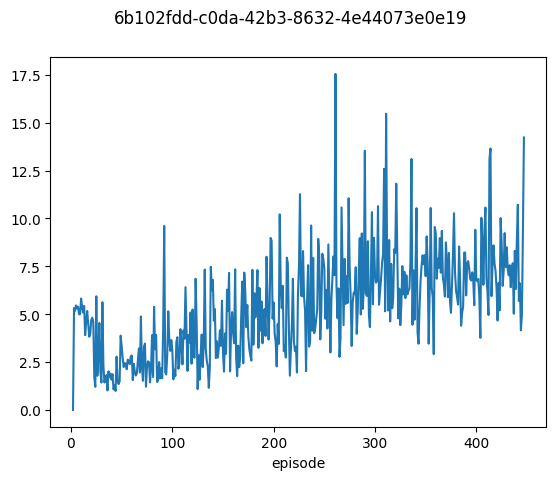

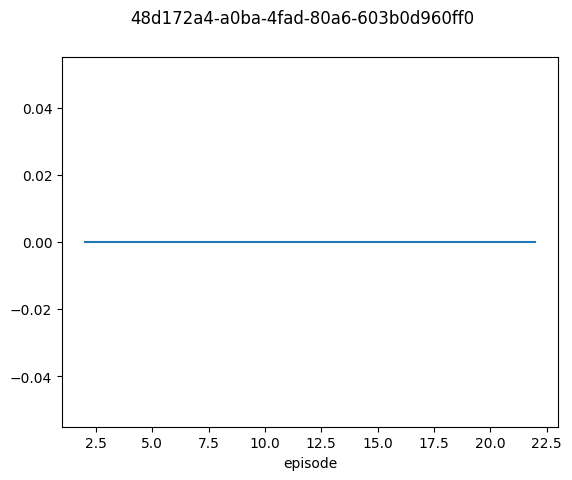

In [55]:
for run_id in list(set([x[0] for x in df_group.index])):
    df_group[run_id].plot(subplots=True, title=run_id)
    plt.show()

In [16]:
df['episode'] = df.episode.ffill()
df['skill_name'] = df.skill_name.ffill()

In [19]:
df = df.dropna(subset=['obs'])

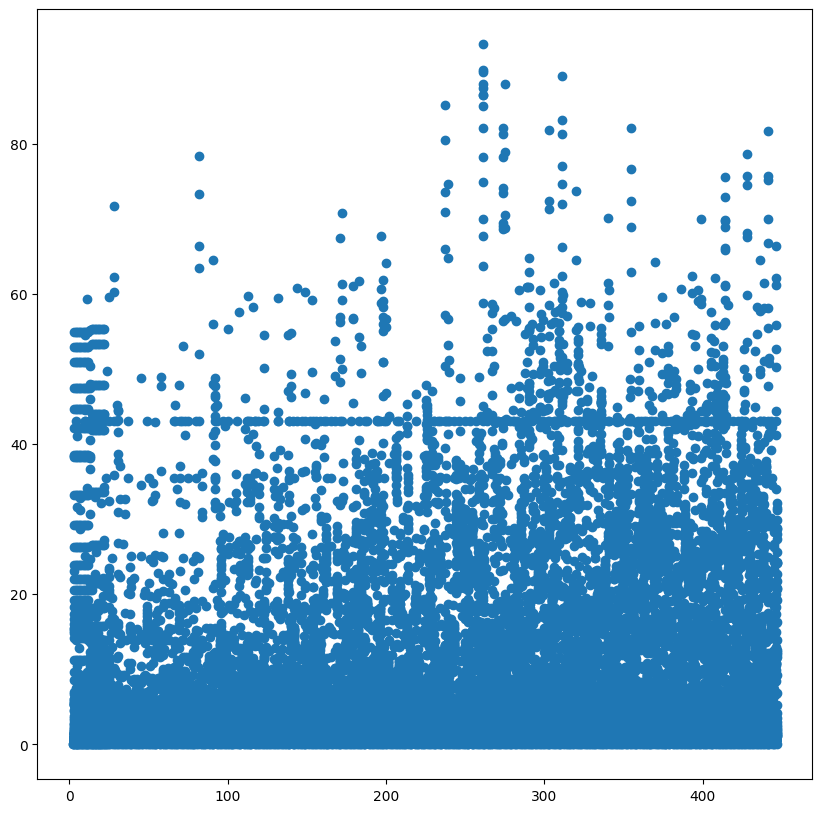

In [30]:
plt.figure(figsize=(10,10))
plt.scatter(df[df['run_id']=='6b102fdd-c0da-42b3-8632-4e44073e0e19']['episode'], df[df['run_id']=='6b102fdd-c0da-42b3-8632-4e44073e0e19']['reward'])
plt.show()

In [ ]:
conn.close()

In [79]:
#t1 = pd.DataFrame()
df_temp = pd.DataFrame(columns=['Ca','Cref'],data=[[3, 4]])

In [80]:
t1 = pd.concat([t1, df_temp])
t1

,Ca,Cref
0,1,2
0,3,4


In [84]:
t1.to_csv('test.csv', index=False)

In [85]:
t2 = pd.read_csv('test.csv')
t2

,Ca,Cref
0,1,2
1,3,4


In [72]:
t = pd.read_csv('../history.csv')
t

,Unnamed: 0.19,Unnamed: 0.18,Unnamed: 0.17,Unnamed: 0.16,Unnamed: 0.15,Unnamed: 0.14,Unnamed: 0.13,Unnamed: 0.12,Unnamed: 0.11,Unnamed: 0.10,...,Unnamed: 0.7,Unnamed: 0.6,Unnamed: 0.5,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,Ca,Cref
